# Análisis Básico de Datos Textuales

Este tutorial es una selección y adaptación al español del libro [Text Analysis in Python for Social Scientist - Discovery and Exploration](https://www.cambridge.org/core/elements/abs/text-analysis-in-python-for-social-scientists/BFAB0A3604C7E29F6198EA2F7941DFF3) de Dirk Hovy. 

## ¿Qué hay en una palabra?

Supongamos que hemos recopilado una gran cantidad de autodescripciones de empresas de sus sitios web. Queremos empezar a averiguar si existen diferencias sistemáticas, cuáles son los grandes temas y cómo actúan normalmente las empresas. La pregunta es, ¿cómo hacemos todo eso? ¿Importa que las empresas compren, compren y estén comprando, o solo queremos saber si hay algún evento de compra, sin importar cuándo? ¿Nos preocupan las preposiciones (por ejemplo, dentro, fuera, sobre, sobre) o simplemente nos distraen de lo que realmente queremos saber? ¿Cómo le decimos al programa que “Facebook adquiere Whatsapp” y “Whatsapp es adquirido por Facebook” significan lo mismo, pero “Whatsapp adquiere Facebook” no (aunque usa las mismas palabras que el primer ejemplo)?

Antes de sumergirnos en las aplicaciones, echemos un vistazo al tema con el que estamos trabajando: el idioma. En esta sección, veremos la terminología para describir algunos de sus elementos básicos (morfología, sintaxis y semántica) y sus equivalentes en el texto (caracteres, palabras, oraciones). Para elegir el método correcto para cualquier pregunta de investigación relacionada con el texto que tengamos, tiene sentido pensar qué es el lenguaje y qué no es, cómo está estructurado y cómo "funciona".
Esta sección no reemplaza una introducción a la lingüística, pero nos da un punto de partida sólido para nuestros propósitos. Si está interesado en leer más sobre esto, hay muchos libros de texto excelentes de introducción a la lingüística y sus diversos subcampos. Uno de los más entretenidos es Fromkin, Rodman y Hyams (2018).

El lenguaje a menudo codifica información de manera redundante, es decir, decimos lo mismo de varias maneras: a través del significado de las palabras, sus posiciones, el contexto y muchas otras señales. Las palabras mismas constan de diferentes componentes, que son el foco de diferentes disciplinas lingüísticas: su significado (semántica), su función en una oración (sintaxis) y los prefijos y terminaciones (morfología). No todas las palabras contienen toda esta información. Y cuando trabajamos con datos textuales, es posible que no estemos interesados ​​en toda esta información. De hecho, puede resultar beneficioso eliminar parte de la información que no necesitamos.

Cuando trabajamos con texto, la unidad que nos interesa depende en gran medida del problema que estamos investigando. Tradicionalmente, se trataba de un informe o un artículo. Sin embargo, cuando trabajamos con redes sociales, también puede referirse al historial de publicaciones completo de un usuario, a un solo mensaje o incluso a una oración individual. A lo largo de este tutorial, nos referiremos a todas estas unidades de texto como documentos. Debe quedar claro en el contexto qué tamaño tiene un documento. Fundamentalmente, un documento siempre representa una observación en nuestros datos. Para referirnos a la colección completa de documentos / observaciones, usamos la palabra corpus (corpora plural).

El conjunto de todos los términos únicos en nuestros datos se llama vocabulario (V). Cada elemento de este conjunto se denomina tipo. Cada aparición de un tipo en los datos se denomina token. Entonces, la oración "una buena oración es una oración que tiene buenas palabras" tiene 10 símbolos pero solo 7 tipos (a saber, "a", "bueno", "oración", "es", "eso", "tiene" y "palabras"). Tenga en cuenta que los tipos también pueden incluir signos de puntuación y expresiones de varias palabras.

### Descriptores de palabras

#### Tokens y Splitting

Imagine que estamos viendo informes y queremos filtrar oraciones cortas porque no contienen nada de interés. La forma más sencilla de hacerlo es definiendo un límite para el número de palabras. Sin embargo, puede resultar sorprendentemente complicado definir qué es una palabra. ¿Cuántas palabras hay en “Se fue a Berlín” y en “Se fue a San Luis Obispo”? La definición más general utilizada en muchos idiomas es cualquier cadena de caracteres delimitada por espacios en blanco. Sin embargo, tenga en cuenta
que el chino, por ejemplo, no usa espacios en blanco entre palabras. Desafortunadamente, no todas las palabras están rodeadas de espacios en blanco. Las palabras al principio de una línea no tienen espacios en blanco de antemano. Las palabras al final de una frase u oración pueden tener un símbolo de puntuación (comas, puntos, exclamación o signos de interrogación, etc.) directamente adjunto. Comillas y corchetes
complica aún más las cosas.

Por supuesto, podemos separar estos símbolos introduciendo espacios en blanco adicionales. Este proceso se llama tokenización (porque hacemos que cada palabra y signo de puntuación sea un token separado). Un proceso diferente, llamado división de oraciones, separa un documento en oraciones y funciona de manera similar. El problema es decidir cuándo un punto es parte de una palabra (como en títulos como Sr. o abreviaturas como abbr.) O un punto al final de una oración. Tanto la tokenización como la división de oraciones son tareas de predicción, para las cuales existen modelos confiables de aprendizaje automático. No discutiremos el funcionamiento interno de estas herramientas en detalle aquí, sino que nos basaremos en las implementaciones de Python disponibles en la biblioteca spacy.

Necesitamos cargar la biblioteca y crear una instancia para el idioma con el que trabajamos (aquí, español), y luego podemos usarlo en cualquier cadena de entrada.


In [3]:
!pip install spacy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datadotworld 1.7.0 requires click<7.0a,>=6.0, but you have click 7.1.2 which is incompatible.
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=a3a429362446845593db4364af2ad7515ee5987b210d2007bba1d1a4c616375e
  Stored in directory: c:\users\renat\appdata\local\pip\cache\wheels\83\a6\12\bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open
  Attempting uninstall: click
    Found existing installation: click 6.7
    Uninstalling click-6.7:
      Successfully uninstalled click-6.7


In [7]:
!python -m spacy download es_core_news_sm

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [2]:
import spacy
nlp = spacy.load("es_core_news_sm")
documents = "Estuve 2 veces en Nueva York en 2011, pero no tenía la constitución para ello. No me atrajo. Prefiero Los Angeles."

# Aplicar la división y tokenización de oraciones a un conjunto de documentos.
tokens = [[token.text for token in sentence] for sentence in nlp(documents).sents]
tokens

[['Estuve',
  '2',
  'veces',
  'en',
  'Nueva',
  'York',
  'en',
  '2011',
  ',',
  'pero',
  'no',
  'tenía',
  'la',
  'constitución',
  'para',
  'ello',
  '.'],
 ['No', 'me', 'atrajo', '.'],
 ['Prefiero', 'Los', 'Angeles', '.']]

#### Lematización

Supongamos que tenemos un gran corpus de artículos de la sección comercial de varios periódicos. Nos interesa saber con qué frecuencia y qué empresas se adquieren entre sí. Tenemos una lista de palabras, pero las palabras vienen en diferentes formas, según el tiempo y el aspecto, por lo que es posible que tengamos que buscar "adquirir", "adquirió", "adquiere" y "adquirirá" (ya que estamos tratando con artículos de periódicos, pueden estar refiriéndose a eventos recientes o planes futuros, y pueden citar a personas). Podríamos intentar formalizar este patrón buscando solo los finales –ir,–rió, –ere y –irá, pero eso solo funciona para verbos regulares que terminan en –ir. Si nos interesan los verbos irregulares, es posible que veamos formas como "ir", "fue", "yendo", o "irá". Y no se detiene ahí: las empresas que buscamos pueden adquirir una sola "subsidiaria" o varias "subsidiarias", una "empresa" o varias "empresas". Necesitamos una forma más basada en principios para lidiar con esta variación.

Cuando buscamos una palabra en un diccionario, generalmente buscamos la **forma base** (en el ejemplo anterior, ese sería el infinitivo "ir"). Esta forma de base de diccionario se llama **lema**. Todas las otras formas no cambian el significado central de este lema, pero agregan más información (como aspectos temporales y de otro tipo). Muchas de estas inflexiones son requeridas por la sintaxis, es decir, el contexto y el orden de las palabras que hacen que una oración sea gramatical. Cuando trabajamos con texto y estamos más interesados ​​en el significado que en la morfología o la sintaxis, puede ser útil reemplazar cada palabra con su lema. Este paso reduce la cantidad de variación en los datos y facilita la recopilación de estadísticas significativas. En lugar de obtener un solo recuento para cada uno de "ir", "fue", "irá" y "yendo", simplemente registraríamos haber visto la forma "ir" cinco veces en nuestros datos. Esta reducción pierde parte de la información temporal y sintáctica, pero esa información puede ser irrelevante para nuestros propósitos. Muchas palabras se pueden lematizar deshaciendo ciertos patrones, según el tipo de palabra. Para las excepciones (por ejemplo, "para ir"), tenemos que tener una tabla de búsqueda.

Afortunadamente, la lematización ya está incorporada en `spaCy`, por lo que podemos hacer uso de ella. Aplicando lematización a nuestras oraciones de ejemplo de arriba, obtenemos:

In [3]:
lemmas = [[token.lemma_ for token in sentence] for sentence in nlp(documents).sents]
lemmas

[['Estuve',
  '2',
  'vez',
  'en',
  'Nueva',
  'York',
  'en',
  '2011',
  ',',
  'pero',
  'no',
  'tener',
  'el',
  'constitución',
  'para',
  'él',
  '.'],
 ['no', 'yo', 'atraer', '.'],
 ['preferir', 'el', 'Angeles', '.']]

### Truncación (Stemming)
 
Quizás estemos buscando textos legales para decisiones políticas y en general estemos interesados ​​en todo lo que tenga que ver con la constitución. Así que las palabras “constitución”, “constituciones”, “constitucional”, “constitucionalidad” y “constitucionalismo” son todas de interés para nosotros, a pesar de tener diferentes partes del discurso. La lematización no nos ayudará aquí, por lo que necesitamos otra forma de agrupar las palabras en clases de palabras.

Una forma aún más radical de reducir la variación es la reducción. En lugar de reducir una palabra al lema, eliminamos todo menos el núcleo morfológico irreductible (la **raíz**). Por ejemplo, para una palabra como "anticonstitucionalismo", que se puede analizar como "anti + constitut + ion + al + ismo", eliminamos todo menos "constitut". La herramienta de truncación más famosa y utilizada se basa en el algoritmo desarrollado por Porter (1980). Para cada idioma, define una cantidad de **sufijos** (es decir, terminaciones de palabras) y el orden en el que deben eliminarse o reemplazarse. Al aplicar repetidamente estas acciones, reducimos todas las palabras a su raíz. En nuestro ejemplo, todas las palabras derivan de la raíz "constitut–" añadiendo diferentes terminaciones.

Nuevamente, una versión del lematizador Porter ya está disponible en Python, en la biblioteca NLTK (Loper & Bird, 2002), pero tenemos que especificar el idioma.

In [4]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer('spanish')

#Aplicar la truncación a un conjunto de documentos
stems = [[stemmer.stem(token) for token in sentence] for sentence in tokens]
stems

[['estuv',
  '2',
  'vec',
  'en',
  'nuev',
  'york',
  'en',
  '2011',
  ',',
  'per',
  'no',
  'ten',
  'la',
  'constitu',
  'par',
  'ello',
  '.'],
 ['no', 'me', 'atraj', '.'],
 ['prefier', 'los', 'angel', '.']]

Si bien esto es extremadamente efectivo para reducir la variación en los datos, puede dificultar la interpretación de los resultados. Una forma de abordar este problema es realizar un seguimiento de todas las palabras originales que comparten una raíz y cuántas veces se produjo cada una de ellas. Entonces podemos reemplazar la raíz con la forma derivada más común (en nuestro ejemplo, esto probablemente sería "constitución"). Tenga en cuenta que esto puede combinar clases de palabras, digamos, sustantivos y verbos, por lo que debemos decidir si usar esto según nuestros objetivos.

#### N-Gramas

Mirar las palabras individualmente puede ser un buen comienzo. Sin embargo, a menudo queremos mirar también el contexto inmediato. En nuestro ejemplo, tenemos dos conceptos que abarcan dos palabras, “Nueva York” y “Los Angeles”, y no los capturamos mirando cada palabra por separado.

En lugar de mirar cada palabra por separado, podemos usar una ventana deslizante de n palabras para examinar el texto. Esta ventana se llama n-grama, donde n puede tener cualquier tamaño. Las palabras individuales también se denominan unigramas, mientras que las combinaciones de dos o tres palabras se denominan bigramas y trigramas, respectivamente. Para n mayor, simplemente escribimos el número, por ejemplo, "4-grama".

Podemos extraer n-gramas con una función de NLTK:

In [5]:
from nltk import ngrams
bigrams = [gram for gram in ngrams(tokens[0], 2)]
bigrams

[('Estuve', '2'),
 ('2', 'veces'),
 ('veces', 'en'),
 ('en', 'Nueva'),
 ('Nueva', 'York'),
 ('York', 'en'),
 ('en', '2011'),
 ('2011', ','),
 (',', 'pero'),
 ('pero', 'no'),
 ('no', 'tenía'),
 ('tenía', 'la'),
 ('la', 'constitución'),
 ('constitución', 'para'),
 ('para', 'ello'),
 ('ello', '.')]

Más adelante veremos cómo podemos unir expresiones de bigrama frecuentes que forman parte de la misma “palabra”.

## Partes del discurso

Supongamos que hemos recopilado una gran cantidad de menús de restaurantes, que incluyen tanto restaurantes de alta cocina como de comida rápida. Queremos saber cómo cada uno de ellos describe la comida. ¿Es simplemente "a la parrilla" o es "jugoso", "fresco" o incluso "artesanal"? Todos estos descriptores de alimentos son adjetivos y, al extraerlos y correlacionarlos con el tipo de restaurante que los usa, podemos aprender algo sobre la autorrepresentación de los restaurantes y sobre la correlación con el precio.

En un nivel muy alto, las palabras denotan cosas, acciones y cualidades en el mundo. Estas categorías corresponden a partes del habla, por ejemplo, sustantivos, verbos y adjetivos (la mayoría de los idiomas tienen más categorías que estas tres). Se denominan conjuntamente palabras de contenido o palabras de clase abierta porque podemos agregar nuevas palabras a cada una de estas categorías (por ejemplo, nuevos sustantivos, como "tweet", o verbos, como "twerking"). Hay otras clases de palabras: determinantes, preposiciones, etc. No "significan" nada (es decir, no se refieren a un concepto), pero ayudan a estructurar una oración y hacerla gramatical. Por lo tanto, se denominan conjuntamente **palabras funcionales** o **palabras de clase cerrada** (es muy poco probable que a alguien se le ocurra una nueva preposición en el corto plazo). En parte porque las palabras funcionales son tan cortas y omnipresentes, a menudo se pasan por alto. Si bien tenemos una idea aproximada de cuántas veces hemos visto el sustantivo "clase" en las últimas oraciones, es casi imposible darse cuenta conscientemente con qué frecuencia hemos visto, digamos, "en".

Los idiomas difieren en la forma en que estructuran las oraciones. En consecuencia, hubo poco acuerdo sobre el número exacto de estas categorías gramaticales, más allá de las tres grandes palabras de contenido (e incluso esas no siempre son seguras). La necesidad de que las herramientas de NLP funcionen en todos los idiomas generó recientemente esfuerzos para crear un pequeño conjunto de categorías que se apliquen a una amplia gama de idiomas (Petrov, Das y McDonald, 2011). Se denomina conjunto de etiquetas de parte del discurso universal (consulte https://universaldependencies.org/u/pos/). En este tutorial, usaremos este conjunto de 15 partes del discurso.

Palabras de clase abierta:
- ADJ: Adjetivos. Modifican sustantivos para especificar sus propiedades. Ejemplos: impresionante, rojo, aburrido
- ADV: Adverbios. Modifican los verbos, pero también sirven como marcadores de preguntas. Ejemplos: tranquilamente, donde, nunca
- INTJ: Interjecciones. Exclamaciones de algún tipo. Ejemplos: ouch, shhh, oi
- NOUN: Sustantivos. Entidades del mundo. Ejemplos: libro, guerra, tiburón
- PROPN: Nombres propios. Nombres de entidades, una subclase de sustantivos. Ejemplos: Rosa, Twitter, CNN
- VERB: Verbos completos. Eventos en el mundo. Ejemplos: códigos, enviados, correctos

Palabras de clase cerrada:
- ADP: Adposiciones. Preposiciones o posposiciones, marcadores de tiempo, lugar, beneficiario, etc. Ejemplos: terminado, antes, (bajar)
- AUX: Verbos auxiliares y modales. Se usa para cambiar de horario o modalidad. Ejemplos: ha (sido), podría (hacer), será (cambiar)
- CCONJ: Conjunciones coordinadoras. Vincular partes de oraciones con igual importancia. Ejemplos: y, o, pero
- DET: Determinantes. Artículos y cuantificadores. Ejemplos: a, ellos, que
- NUM: Números. Exactamente lo que pensarías que es:::
- PART: Partículas. Posesivos y marcadores gramaticales. Ejemplos: ’s
- PRON: Pronombres. Sustituciones de sustantivos. Ejemplos: tú, ella, él, yo
- SCONJ: Conjunciones subordinadas. Vincula partes de oraciones con una parte que sea más importante. Ejemplos: ya que, si, eso

Otros:
- PUNCT: Signos de puntuación. Ejemplos:!,?, -
- SYM: Símbolos. Entidades parecidas a palabras, a menudo caracteres especiales, incluidos emojis. Ejemplos:%, $, :)
- X: Otro. Todo lo que no se ajuste a ninguno de los anteriores. Ejemplos: pffffrt

La determinación automática de las partes del discurso y la sintaxis de una oración se conoce como etiquetado y análisis de POS, dos de las primeras y más exitosas aplicaciones de NLP. Podemos usar nuevamente el etiquetador POS de `spaCy`:

In [6]:
pos = [[token.pos_ for token in sentence] for sentence in nlp(documents).sents]
pos

[['PROPN',
  'NUM',
  'NOUN',
  'ADP',
  'PROPN',
  'PROPN',
  'ADP',
  'NOUN',
  'PUNCT',
  'CCONJ',
  'ADV',
  'VERB',
  'DET',
  'NOUN',
  'ADP',
  'PRON',
  'PUNCT'],
 ['ADV', 'PRON', 'VERB', 'PUNCT'],
 ['VERB', 'DET', 'PROPN', 'PUNCT']]

Debido a que el etiquetado POS fue una de las primeras aplicaciones exitosas de PNL, se han realizado muchas investigaciones al respecto. Por ahora, los etiquetadores de POS son más precisos, más consistentes y definitivamente mucho más rápidos que incluso los lingüistas mejor capacitados.

## Stopwords

Si queremos evaluar los temas generales en las revisiones de productos, generalmente no nos importa si una revisión se refiere al "precio" o "un precio", y podemos eliminar el determinante. Del mismo modo, si miramos la posición política de los partidos en sus manifiestos, sabemos quién escribió cada manifiesto. Por tanto, no es necesario que conservemos sus nombres cuando se mencionen a sí mismos en el documento. En ambos casos, tenemos un conjunto de palabras que aparecen con frecuencia, pero que no aportan mucho a nuestra tarea, por lo que puede ser beneficioso eliminarlas. El conjunto de estas palabras ignorables es **stopwords**.

Como hemos visto anteriormente, muchas palabras de un texto pertenecen al conjunto de palabras funcionales. De hecho, las palabras más frecuentes en cualquier idioma son predominantemente palabras funcionales. Si bien todas estas son palabras muy útiles al construir una oración, en realidad no significan mucho por sí mismas, es decir, sin contexto. De hecho, para la mayoría de las aplicaciones (por ejemplo, modelos de temas; consulte Boyd-Graber, Mimno y Newman, 2014), es mejor ignorarlos por completo.

Podemos excluir las stopwords en función de su parte del discurso (ver más arriba) o mediante el uso de una lista. El primero es más general, pero corre el riesgo de descartar a algunos candidatos no deseados. (Si excluimos las preposiciones, corremos el riesgo de perder el sustantivo "redondo" si se etiqueta incorrectamente). Este último es más específico de la tarea (por ejemplo, podemos usar una lista de nombres de partidos políticos), pero corre el riesgo de omitir las palabras que estábamos desconoce al compilar la lista. Por lo tanto, a menudo puede resultar beneficioso utilizar una combinación de ambos. En `spaCy`, podemos usar la propiedad `is_stop` de un token, que lo compara con una lista de palabras vacías comunes.

Para nuestro ejemplo en ejecución, si excluimos las palabras vacías comunes y filtramos las palabras que no contienen contenido (todas las partes del discurso excepto NOUN, VERB, PROPN, ADJ y ADV):

In [7]:
# Seleccionar palabras de contenido a partir de POS.
content = [[token.text for token in sentence if token.pos_ in {'NOUN', 'VERB', 'PROPN', 'ADJ', 'ADV'} 
            and not token.is_stop] for sentence in nlp(documents).sents]
content

[['Estuve', 'York', '2011', 'constitución'],
 ['atrajo'],
 ['Prefiero', 'Angeles']]

Otra forma de reducir la variación es reemplazar los números con una ficha especial, en lugar de eliminarlos. Hay infinitos números posibles y, en muchos contextos, no nos importa la cantidad exacta que denotan (a menos que, por supuesto, estemos interesados en los precios). Veremos un ejemplo de cómo hacer esto de manera más eficiente en la Sección 3, cuando aprendamos sobre las expresiones regulares.

## Entidades nombradas

Digamos que estamos interesados ​​en los patrones cambiantes del turismo y queremos encontrar los destinos más populares a lo largo del tiempo en un corpus de blogs de viajes. Nos gustaría una forma de identificar los nombres de países, ciudades y puntos de referencia. Al usar el etiquetado de POS, podemos identificar fácilmente todos los nombres propios, pero eso aún no nos dice con qué tipo de entidad estamos tratando. Estas categorías semánticas de palabras se denominan entidades con nombre.

Los nombres propios se refieren a entidades del mundo real, como empresas, lugares, personas o cualquier otra cosa, por ejemplo, Apple, Italia, George Oscar Bluth, LAX o Mercedes. Si bien la implementación de un reconocedor de entidades con nombre (NER) está fuera del alcance de este trabajo, generalmente funciona mediante el uso de una lista de entidades conocidas que es poco probable que cambien (por ejemplo, nombres de países o nombres). Sin embargo, los nombres son probablemente la clase de palabras más abierta e innovadora, y hay muchas entidades que no figuran en ninguna parte. Afortunadamente, a menudo podemos determinar qué tipo de entidad tenemos observando el contexto en el que ocurren. Por ejemplo, los nombres de las empresas pueden ir seguidos de "Inc." o "LLC". La sintaxis puede darnos más pistas: si una entidad dice algo, come, duerme o está asociada con otros verbos que denotan actividades humanas, podemos etiquetarla como persona. (Por supuesto, esto se vuelve más complicado cuando tenemos un lenguaje metafórico, por ejemplo, “El parlamento dice:::”).

Afortunadamente, `spaCy` proporciona un reconocedor de entidad con nombre que puede ayudarnos a identificar una amplia gama de tipos: PERSON, NORP (nacionalidad O grupo religioso o político), FAC (instalación), ORG (organización), GPE (Entidad geopolítica), LOC (ubicaciones , como mares o montañas), PRODUCT, EVENT (en deportes, política, historia, etc.), WORK_OF_ART, LAW, LANGUAGE, DATE, TIME, PERCENTAJG, MONEY, QUANTITY, ORDINAL (números ordinales como "tercero"), y CARDINAL (números regulares).

Para nuestro ejemplo de ejecución, podemos usar el siguiente código para extraer las palabras y sus tipos:

In [8]:
entities = [[(entity.text , entity.label_) for entity in nlp(sentence.text).ents] for sentence in nlp(documents).sents]
entities

[[('Estuve 2', 'MISC'), ('Nueva York', 'LOC')], [], [('Los Angeles', 'LOC')]]

>Nota: Aquí este procedimiento puede fallar debido a limitaciones idiomáticas. La mayoría de los modelos y funciones de NLP están diseñadas para el inglés, y cuando se cambia de idioma el desempeño de estas puede reducirse. 

## Sintaxis

Digamos que estamos interesados ​​en adquisiciones firmes. Imagine que queremos filtrar todas las transacciones comerciales (quién compró a quién) de un gran corpus de texto de Newswire. Definimos una lista de verbos que expresan adquisiciones y queremos encontrar todos los sustantivos asociados con estos verbos. Es decir, quién adquiere (los sujetos) o quién adquiere (los objetos). Queremos terminar con triples NOUN-VERB-NOUN que nos den los nombres de las firmas y otras entidades involucradas en las adquisiciones, así como el verbo.

Ya hemos visto que las palabras pueden tener diferentes formas gramaticales, es decir, partes del discurso (sustantivos, verbos, etc.). Sin embargo, una oración puede tener muchas palabras con el mismo POS, y lo que significa una palabra específica en una oración depende en parte de su función gramatical. La estructura de la oración, o sintaxis, es un campo de estudio esencial en lingüística y explica cómo las palabras de una oración se unen.

Una de las claves más importantes de la función de una palabra en inglés es su posición en la oración. En inglés, la función gramatical está determinada principalmente por el orden de las palabras, mientras que otros idiomas usan marcadores en las palabras. Cambiar el orden de las palabras cambia la función gramatical de la palabra. Considere la diferencia entre "El nadador come pescado" y "El pescado come al nadador". El sujeto (la entidad que come) y el objeto (la entidad que se come) ahora se cambian. Ya hemos visto verbos, sujetos y objetos como ejemplos de funciones sintácticas, pero hay muchas otras posibles relaciones de dependencia que pueden darse entre palabras. La idea en la gramática de dependencia es que la oración “cuelga” del verbo principal como un móvil. Los vínculos entre palabras describen cómo están conectadas las palabras.

Naturalmente, estas conexiones pueden variar bastante entre idiomas, pero de manera similar a las etiquetas POS Universal, se han realizado esfuerzos para unificar y limitar el conjunto de posibilidades (McDonald et al., 2013; Nivre et al., 2015, 2016, entre otros. alia). Aquí hay una lista de los que se usaron en el proyecto de dependencias universales (nuevamente, consulte https://universaldependencies.org):

- acl, modificador clausal de un sustantivo (cláusula adjetiva)
- advcl, modificador de cláusula adverbial
- advmod, modificador adverbial
- amod, modificador de adjetivo
- appos, modificador de aposición
- aux, verbo auxiliar
- case, marcador de estuches
- cc, conjunción coordinadora
- ccomp, complemento clausal
- clf, clasificador
- compound, compuesto
- conj, conjunción
- cop, cópula
- csubj, sujeto clausal
- dep, dependencia no especificada
- det, determinante
- discourse, elemento del discurso
- dislocated, dislocados
- dobj, objeto directo
- expl, improperio
- fixed, fija de varias palabras
- flat, plana de varias palabras
- goeswith, va con
- iobj, objeto indirecto
- list, lista
- mark, marcador
- nmod, modificador nominal
- nsubj, sujeto nominal
- nummod, modificador numérico
- obj, objeto
- obl, nominal oblicuo
- orphan, huérfano
- parataxis, parataxis
- pobj, objeto preposicional
- puntc, puntuacion
- reparandum, disfluencia anulada
- root, la raíz de la oración, generalmente un verbo
- vocative, vocativo
- xcomp, complemento clausal abierto

Es posible que muchos de estos nunca o rara vez ocurran en el lenguaje que estudiamos, y para muchas aplicaciones, es posible que solo queramos ver un pequeño puñado de relaciones, por ejemplo, los argumentos centrales, nsubj, obj, iobj, pobj o root. Podemos ver un ejemplo de un análisis de dependencia en la Figura 1. ¿Por qué es relevante? Porque saber dónde se encuentra una palabra en la oración y qué otras palabras están relacionadas con ella (y en qué función), nos ayuda a darle sentido a una oración. En Python, podemos usar el analizador de la biblioteca spaCy para obtener:

In [9]:
[[(c.text , c.head.text , c.dep_) for c in nlp(sentence.text)] for sentence in nlp(documents).sents]

[[('Estuve', 'Estuve', 'ROOT'),
  ('2', 'Estuve', 'nummod'),
  ('veces', 'Estuve', 'nmod'),
  ('en', 'Nueva', 'case'),
  ('Nueva', 'Estuve', 'nmod'),
  ('York', 'Nueva', 'flat'),
  ('en', '2011', 'case'),
  ('2011', 'Estuve', 'nmod'),
  (',', 'tenía', 'punct'),
  ('pero', 'tenía', 'cc'),
  ('no', 'tenía', 'advmod'),
  ('tenía', 'Estuve', 'conj'),
  ('la', 'constitución', 'det'),
  ('constitución', 'tenía', 'obj'),
  ('para', 'ello', 'case'),
  ('ello', 'tenía', 'obl'),
  ('.', 'Estuve', 'punct')],
 [('No', 'atrajo', 'advmod'),
  ('me', 'atrajo', 'obj'),
  ('atrajo', 'atrajo', 'ROOT'),
  ('.', 'atrajo', 'punct')],
 [('Prefiero', 'Prefiero', 'ROOT'),
  ('Los', 'Angeles', 'det'),
  ('Angeles', 'Prefiero', 'flat'),
  ('.', 'Prefiero', 'punct')]]

Podemos ver cómo el verbo “estado” es el nodo raíz del que cuelga todo lo demás. Para nuestro ejemplo con las adquisiciones de firmas, querríamos extraer cualquier cosa etiquetada con nsubj, dobj o pobj.

Si estás trabajando con otros idiomas además del inglés, puedes, en muchos casos, aún lematizar los datos. Sin embargo, es posible que tenga menos o ninguna opción para etiquetado POS, parsing y NER. Sin embargo, para las aplicaciones más avanzadas, un preprocesamiento adecuado suele ser más importante que poder realizar todo tipo de análisis lingüísticos. Sin embargo, si su análisis se basa en estas herramientas, eche un vistazo a la literatura de NLP sobre el procesamiento del lenguaje de bajos recursos, un subcampo afortunadamente creciente en el NLP.

Ahora que hemos visto cuáles son los componentes básicos del análisis lingüístico, podemos empezar a buscar la extracción de información del texto. Veremos cómo buscar patrones flexibles en los datos para identificar cosas como direcciones de correo electrónico, nombres de empresas o cantidades numéricas. Además, veremos cómo encontrar las palabras más significativas e importantes en un corpus. (dado que la frecuencia pura no es un indicador perfecto). Y veremos cómo captar que algunas palabras ocurren con mucha más frecuencia juntas que solas, y cómo definir esta noción.

## Expresiones Regulares

Supongamos que está trabajando con una gran muestra de registros de empleo de empleados italianos, con información detallada sobre cuándo trabajaron en qué empresa y una descripción de lo que hicieron allí. Sin embargo, los nombres de las empresas figuran en el texto, en lugar de en una entrada separada. Desea extraer los nombres para obtener una descripción general aproximada de cuántas empresas diferentes hay y agrupar los registros en consecuencia. Desafortunadamente, la herramienta NER para italiano no funciona tan bien como le gustaría. Sin embargo, sabe que los nombres de las empresas italianas a menudo terminan en varias abreviaturas (similar a "Co.",
"Ltd." o "Inc."). Solo hay dos que desea considerar por ahora ("s.p.a." y "s.r.l."), pero vienen en muchas variaciones de ortografía diferentes (por ejemplo, SPA, spa, S.P.A.). ¿Cómo puede identificar estos marcadores y extraer los nombres de las empresas justo antes de ellos?

En el mismo proyecto, ha recopilado datos de encuestas de una gran muestra de empleados. Algunos de ellos han dejado su dirección de correo electrónico como parte de la respuesta y le gustaría detectar y extraer las direcciones de correo electrónico. Puede buscar cualquier cosa que venga antes o después del signo @, pero ¿cómo se asegura de que no sea un identificador de Twitter? ¿Y cómo se asegura de que sea una dirección de correo electrónico válida?

La variación de cadenas es una aplicación de libro de texto de expresiones regulares (o RegEx). Son patrones flexibles que le permiten especificar lo que está buscando en general y cómo puede variar. Para hacerlo, simplemente escriba el patrón que desea hacer coincidir. La Tabla 1 muestra ejemplos de patrones simples y sus coincidencias.

En Python, podemos especificar expresiones regulares y luego aplicarlas al texto con `search()` o `match()`. El primero verifica si un patrón está contenido en la entrada, el segundo verifica si el patrón coincide completamente con la entrada:




In [10]:
import re
pattern = re.compile("at")
print(re.search(pattern , 'later'))
print(re.match(pattern , 'later')) 

<re.Match object; span=(1, 3), match='at'>
None


A veces, sabemos que un caracter específico estará en nuestro patrón, pero no cuántas veces. Podemos usar cuantificadores especiales para señalar que el carácter justo antes de ellos ocurre cualquier número de veces, incluyendo cero (*), exactamente una o cero veces (?), O una o más veces (+). Vea los ejemplos en la siguiente tabla:

| Cuantificador 	|  Medios 	| Ejemplo 	|           Matches          	|
|:-------------:	|:-------:	|:-------:	|:--------------------------:	|
|       ?       	|  0 o 1  	|  fr?og  	|          fog, frog         	|
|       *       	| 0 o más 	|  cooo*l 	|         cool, coool        	|
|       +       	| 0 o más 	|  hello+ 	| hello, helloo, hellooooooo 	|

En Python, simplemente los incorporamos a los patrones:

In [11]:
pattern1 = re.compile("fr?og")
pattern2 = re.compile("hello+")
pattern3 = re.compile("cooo*l")

Los RE también proporcionan un conjunto completo de caracteres especiales para coincidir con ciertos tipos de caracteres o posiciones:

| Caracter 	|                           Medios                          	| Ejemplo 	|                  Matches                 	|
|:--------:	|:---------------------------------------------------------:	|:-------:	|:----------------------------------------:	|
|     .    	|                     cualquier caracter                    	|   .el   	|               eel, Nel, gel              	|
|    \n    	|         carácter de nueva línea  (salto de línea)         	|   \n+   	|        uno o más  saltos de línea        	|
|    \t    	|                         tabulación                        	|   \t+   	|          una o más  tabulaciones         	|
|    \d    	|                    un solo dígito \[0-9\]                   	|   B\d   	|              B0, B1, ..., B9             	|
|    \D    	|                        un no digito                       	|   \D.t  	|               ' t, But, eat              	|
|    \w    	|              cualquier carácter  alfanumérico             	|  \w\w\w 	|             top, WOO, bee,...            	|
|    \W    	|                 carácter  no alfanumérico                 	|         	|                                          	|
|    \s    	|             un personaje de  espacio en blanco            	|         	|                                          	|
|    \S    	|        un carácter que no  es un espacio en blanco        	|         	|                                          	|
|     \    	| "Escapa" de los caracteres  especiales para que coincidan 	| .+\.com 	|           abc.com,  united.com           	|
|     ˆ    	|            el comienzo de la  cadena de entrada           	|   ˆ...  	| primera palabra de  tres letras en línea 	|
|     $    	|             el final de la  cadena de entrada             	|   ˆ\n$  	|                linea vacía               	|

Sin embargo, tal vez no queramos realmente ningún carácter antiguo en una posición de comodín, solo uno de un pequeño número de caracteres. Para ello, podemos definir clases de caracteres permitidos:

En Python, podemos usar clases de caracteres para definir nuestros patrones. Mira los ejemplos de la siguiente tabla:

|   Clase  	|                     Medios                     	|     Ejemplo     	|                Matches                	|
|:--------:	|:----------------------------------------------:	|:---------------:	|:-------------------------------------:	|
|  \[abc\] 	|      coincidir con cualquiera  de a, b, c      	|   \[bcrms\]at   	|        bat, cat, rat, mat, sat        	|
| \[ˆabc\] 	|     coincidir con cualquiera  PERO a, b, c     	|    te\[ˆ \]+s   	| tens, tests, teens, texts, terrors... 	|
|  \[a-z\] 	| coincidir con cualquier  carácter en minúscula 	| \[a-z\]\[a-z\]t 	|         act, ant, not, ... wit        	|
|  \[A-Z\] 	| coincidir con cualquier  carácter en mayúscula 	|    \[A-Z\]...   	|      Ahab, Brit, In a, ..., York      	|
|  \[0-9\] 	|         coincidir con  cualquier dígito        	|   DIN A\[0-9\]  	|      DIN A0, DIN A1, ..., DIN A9      	|

In [12]:
pattern = re.compile('[bcr]at')

Hasta ahora, solo hemos definido caracteres individuales y sus repeticiones. Sin embargo, las expresiones regulares también nos permiten especificar grupos completos, como se muestra en la tabla:

|  Grupo  	|              Medios             	|   Ejemplo  	|       Matches       	|
|:-------:	|:-------------------------------:	|:----------:	|:-------------------:	|
|  (abc)  	| secuencia de  coincidencias abc 	|   .(ar).   	| hard, cart, fare... 	|
| (ab\|c) 	|        coincidir  ab o c        	| (ab\|C)ate 	|     abate, Cate     	|

Para aplicar RE a cadenas en Python, tenemos varias opciones. Podemos hacer `match()` a cadenas de entrada, que solo tendrán éxito si pueden cubrir toda la cadena. Si solo nos interesa saber si el patrón está contenido como una subcadena, podemos usar `search()` en su lugar.

In [13]:
document = 'el bateador ganó el juego'
matches = re.match(pattern , document)
print(matches)
searches = re.search(pattern , document)
print(searches)

None
<re.Match object; span=(3, 6), match='bat'>


Cualquiera de estas operaciones devuelve un objeto que es None si el patrón no se pudo aplicar. De lo contrario, nos proporcionará varias propiedades de los resultados: `span()` nos da una tupla de las posiciones de la subcadena que coinciden con el patrón (y que pueden usarse como índices para cortar), mientras que `group()` devuelve la subcadena coincidente. Para nuestro ejemplo anterior, `searches.span()` devolverá (4, 7), mientras que `searches.group()` devuelve 'bat'. Si definimos varios grupos en nuestro patrón, podemos acceder a ellos a través de `groups()`, ya sea de forma conjunta o individual.

In [27]:
word = 'preconstitutionalismo'
affixes = re.compile('(...).+(...)')
results = re.search(affixes , word)
print(results)

<re.Match object; span=(0, 21), match='preconstitutionalismo'>


Aquí, `results.groups()` devolverá el prefijo y el sufijo que se encuentran en la entrada, es decir, ('pre', 'ism'). Por último, también podemos usar la expresión regular para reemplazar elementos de la cadena de entrada que coinciden con el patrón a través de `sub()`. Hemos mencionado anteriormente cómo podemos reemplazar los dígitos de cualquier número con un token especial, por ejemplo 0. El siguiente código hace esto:

In [15]:
# Reemplazo de patrones en una cadena.
numbers = re.compile('[0-9]')
re.sub(numbers , '0', 'En los 90, cuando tenía 12 años, ¡un CD costaba solo 15,99 USD!')

'En los 00, cuando tenía 00 años, ¡un CD costaba solo 00,00 USD!'

>Las expresiones regulares son extremadamente poderosas, pero necesita saber cuándo detenerse. Una expresión regular bien escrita puede ahorrarle mucho trabajo y lograr bastante en términos de extraer los fragmentos de texto correctos. Sin embargo, las expresiones regulares pueden volverse extremadamente complicadas rápidamente cuando agrega más y más variantes de las que le gustaría tener en cuenta. Es muy fácil escribir una expresión regular que capture demasiado (falsos positivos) o que sea tan específica que capture muy poco (falsos negativos). Por lo tanto, siempre es una buena idea escribir un par de ejemplos positivos y negativos, y asegurarse de que la expresión regular que desarrolle coincida con lo que desea.

## Información mutua puntual (Pointwise Mutual Information)

Intuitivamente, nos gustaría tratar términos como "redes sociales", "Nueva York" o "emisión de gases de efecto invernadero" como un concepto único, en lugar de tratarlos como unidades individuales delimitadas por espacios en blanco. Sin embargo, mirar la frecuencia de las dos palabras juntas no es suficiente. El par de palabras "de ella" es extremadamente frecuente, pero nadie diría que se trata de un concepto único y significativo. Para complicar más las cosas, cada parte de estos a menudo también ocurre por sí misma. Piense en los elementos de "Nueva York" (mientras que "York" probablemente no sea demasiado frecuente, "Nueva" definitivamente lo es). Dejar estas palabras aparte o unirlas tendrá un gran impacto en nuestros hallazgos. ¿Cómo unimos las palabras correctas?

Sin embargo, palabra es un concepto blando. Hemos visto que los espacios en blanco son más un efecto visual opcional que un límite significativo de palabras (por ejemplo, el chino no los usa). Incluso los famosos compuestos de sustantivos alemanes (“Nahrungsmittelettikierungsgesetz” o “ley para el etiquetado de productos alimenticios”) pueden verse como una forma más eficiente de escribir las palabras en espacios en blanco.

Incluso en español, tenemos conceptos que incluyen varias palabras, pero que ya no analizaríamos como componentes separados. Piense en nombres de lugares como "Los Ángeles" y "San Luis Obispo", pero también en conceptos como "redes sociales". (Si no está de acuerdo con esto último, es porque el proceso, llamado gramaticalización, es gradual y, en este caso, no se ha completado por completo). Si bien todavía es evidente lo que significan las partes, se han vinculado inextricablemente entre sí. Estos pares de palabras se denominan **colocaciones**.

Cuando trabajamos con texto, a menudo es mejor tratar las colocaciones como una entidad, en lugar de como unidades separadas. Para hacer esto, generalmente reemplazamos el espacio en blanco entre las palabras con un guión bajo (es decir, usaríamos los_angeles). Hay algunas colocaciones "generales" (como "Nueva York" o "Los Ángeles"). Sin embargo, casi todos los dominios incluyen conceptos especializados relevantes para el contexto de nuestro análisis. Por ejemplo, "ganancias trimestrales" en los informes de ganancias o "excelente servicio" si estamos analizando reseñas en línea.

Podemos calcular la probabilidad de que cada palabra ocurra por sí sola, pero esto no ayuda mucho: es mucho más probable que ocurra "Nueva" que "York". Necesitamos relacionar estas cantidades con la probabilidad de que las dos palabras aparezcan juntas. Si alguna (o todas) de las palabras candidatas aparecen en el contexto de las demás, tenemos motivos para creer que se trata de una colocación, p. Ej., "Ángeles" en el caso de "Los Ángeles". Si, por otro lado, cualquier palabra tiene la misma probabilidad de ocurrir de forma independiente, probablemente no tengamos una colocación, por ejemplo, "de" y "el" en "de".

Aplicar la detección de colocación a un corpus de ejemplo en Python es mucho más fácil, ya que hay algunas funciones implementadas en NLTK que nos salvan de calcular todas las tablas de probabilidad:

In [16]:
from urllib.request import urlopen
url = "https://www.gutenberg.org/files/21282/21282-8.txt"
raw = urlopen(url).read().decode('ISO-8859-1')
documents = raw[1500:286409]
documents = [str(sentence) for sentence in nlp(documents).sents]

In [30]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.corpus import stopwords

stopwords_ = set(stopwords.words('spanish'))
words = [word.lower() for document in documents for word in document.split() if len(word) > 2 and word not in stopwords_]

# Encontrar colocaciones con NLTK
finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures ()
collocations = {bigram: pmi for bigram , pmi in finder.score_ngrams(bgm.mi_like)}
collocations

'alcalde.', '--¡por'): 1.0,
 ('alcanza', 'adulador,'): 1.0,
 ('alcanzase', 'torcer'): 1.0,
 ('alcohol', 'retemplaba'): 1.0,
 ('alcohol,', 'desconoció'): 1.0,
 ('alcurnia,', 'rezaban'): 1.0,
 ('alegato', 'filiación'): 1.0,
 ('alejandro', '(rodrigo'): 1.0,
 ('alejó', 'mendigo--.'): 1.0,
 ('alentado', 'elogios,'): 1.0,
 ('alentando', 'conspiradores.'): 1.0,
 ('alevoso,', 'enemigo'): 1.0,
 ('alforjas.', 'titulábase'): 1.0,
 ('alfredo', 'musset,'): 1.0,
 ('algarrobo.', '¡bien'): 1.0,
 ('algo', 'parecido'): 1.0,
 ('algunos', 'pasarán'): 1.0,
 ('algórgoras', 'brujoleos,'): 1.0,
 ('alharaca', 'viejas'): 1.0,
 ('alias', 'judío'): 1.0,
 ('alientos', 'cesaba'): 1.0,
 ('alistaba', 'flota'): 1.0,
 ('alistar', 'escuadra,'): 1.0,
 ('alistase', 'bagaje'): 1.0,
 ('allana', 'pagarte,'): 1.0,
 ('almacén', 'lágrimas;'): 1.0,
 ('almagristas,', 'gonzalistas,'): 1.0,
 ('almidonada', 'gorguera.'): 1.0,
 ('almirante.', 'insultado'): 1.0,
 ('almirez,', 'morterito'): 1.0,
 ('almita', 'limbo,'): 1.0,
 ('almitas',

El código primero crea una larga lista de cadenas del corpus, eliminando todas las palabras vacías y las palabras de menos de dos caracteres (eliminando así la puntuación). Luego crea un objeto BigramCollocationFinder, inicializado con la lista de palabras. De este objeto, podemos extraer las estadísticas. Aquí, usamos una variante de PMI, llamada mi_like, que no toma el logaritmo, pero usa un exponente.

>Todas las últimas secciones son ejemplos de preprocesamiento, para eliminar el ruido y las variaciones innecesarias y para aumentar la cantidad de señal en los datos. Todos estos pasos se pueden combinar, por lo que obtenemos una versión mucho más homogénea y menos ruidosa de nuestro corpus de entrada. Sin embargo, no existe una regla general sobre qué pasos excluir y cuáles conservar.

>En última instancia, qué conjunto de pasos de preprocesamiento aplicar depende en gran medida de la tarea y los objetivos. Tiene sentido probar diferentes combinaciones en un conjunto de desarrollo separado y reservado, y observar cuál da los mejores resultados. Más importante aún, las decisiones de preprocesamiento siempre cambian el texto y, por lo tanto, afectan las inferencias que podemos hacer. Debemos ser conscientes de este efecto, y debemos justificar y documentar todos los pasos previos al procesamiento y las decisiones que hemos tomado (cf. Denny y Spirling, 2018).

## Conteo TF-IDF

El conteo de palabras es un buen comienzo, pero da el mismo peso a todos los términos con la misma frecuencia. Sin embargo, algunos términos son más "interesantes" que otros, incluso si tienen las mismas o menos ocurrencias. Supongamos que tenemos 500 empresas y, para cada una de ellas, informes anuales de varios años. Los informes recopilados de cada empresa son un documento. No nos sorprenderá encontrar las palabras “informe” o “empresa” entre los términos más frecuentes, ya que seguramente se utilizarán en todos los documentos. Sin embargo, si solo algunas de esas empresas utilizan la "sostenibilidad", pero lo hacen de forma coherente en todos los informes, esta sería una señal muy interesante que vale la pena descubrir. ¿Cómo captar esta noción?

Cuando miramos por primera vez un corpus, normalmente queremos saber de qué se trata en general y a qué términos deberíamos prestar especial atención. La frecuencia por sí sola no es suficiente para encontrar palabras importantes: muchas de las palabras vacías que eliminamos intencionalmente son extremadamente frecuentes. Sin embargo, hay algo en la frecuencia de las palabras que transporta información. Simplemente no es la frecuencia bruta de cada palabra.

La respuesta es sopesar la frecuencia bruta (su **frecuencia de término**, o TF) por el número de documentos en los que aparece la palabra (su **frecuencia de documento** o IDF). De esta forma, las palabras que aparecen con frecuencia, pero en todos los documentos (como las palabras funcionales), recibirán puntuaciones muy bajas. También lo serán las palabras que son raras, pero que podrían aparecer en todas partes (digamos, “presidente” en nuestro ejemplo: no es frecuente, pero será mencionado en todos los informes). Las palabras que son moderadamente frecuentes pero que aparecen en solo unos pocos documentos obtienen la puntuación más alta, y estas palabras son lo que buscamos. Podemos obtener ambas cantidades de una matriz de conteo discreta. El TF es la suma sobre la columna correspondiente de la matriz, mientras que el DF es el recuento de las entradas distintas de cero en esa columna.

Al graficar los valores de IDF versus TF-IDF, y escalar por TF, podemos ver cómo se distribuyen las palabras ininterrumpidas en un corpus. El gráfico muestra las palabras de contenido en Tradiciones Peruanas. Se etiquetan las cinco palabras con las puntuaciones TF-IDF más altas. Si bien la prevalencia de "virrey" no es sorprendente (el TF-IDF está dominado por el TF alto, pero es un libro de ficciones históricas), podemos ver un par de entradas interesantes como "Lima" y "Don", que sugieren el tenor y la localización de los relatos.

En Python, podemos usar TfidfVectorizer en sklearn:


In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df =0.001, max_df=0.75, 
                                    stop_words=stopwords_,sublinear_tf=True)
X = tfidf_vectorizer.fit_transform(documents)

Esto devuelve una matriz de datos con una fila para cada documento y los valores transformados en las celdas. Podemos obtener los valores IDF de la propiedad `idf_` del vectorizador. Para obtener los valores TF-IDF de una determinada característica para todo el corpus, podemos sumar todas las filas/documentos. La propiedad A1 convierte la matriz dispersa en una matriz regular:

In [171]:
idf = tfidf_vectorizer.idf_
tfidf = X.sum(axis=0).A1

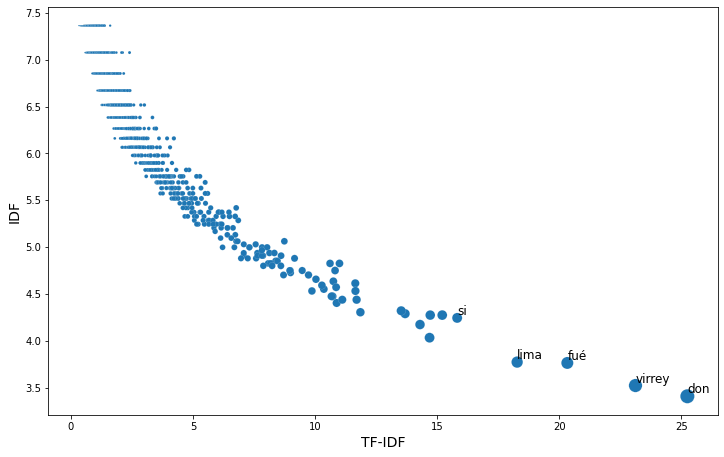

In [175]:
import seaborn as sns
plt.figure(figsize=(12,7.5))
sns.scatterplot(x=tfidf,y=idf,size=tfidf/idf,legend=False,sizes=(1, 200))
plt.xlabel("TF-IDF",size=14)
plt.ylabel("IDF",size=14)
names=tfidf_vectorizer.get_feature_names()
top = (tfidf/idf).argsort()[-5:]
for i in top: plt.text(tfidf[i], idf[i], str(names[i]),size=12,va='bottom',ha='left')

Si tienes tiempo, te invito a revisar el contenido de los libros [Text Analysis in Python for Social Scientists – Discovery and Exploration](https://www.cambridge.org/core/elements/abs/text-analysis-in-python-for-social-scientists/BFAB0A3604C7E29F6198EA2F7941DFF3) y [Twitter as Data](https://www.cambridge.org/core/elements/abs/twitter-as-data/27B3DE20C22E12E162BFB173C5EB2592).